In [1]:
from qiskit.test.mock import FakeBogota

In [2]:
backend = FakeBogota()

In [3]:
from qiskit.tools.jupyter import backend_overview

In [4]:
backend

<FakeBogota('fake_bogota')>

In [5]:
props=backend.properties()

In [6]:
for i in range(backend.configuration().n_qubits):
    print('The X gate have length',props.gate_length('x',i)*1e9,'nanosecs')

The X gate have length 35.55555555555556 nanosecs
The X gate have length 35.55555555555556 nanosecs
The X gate have length 35.55555555555556 nanosecs
The X gate have length 35.55555555555556 nanosecs
The X gate have length 35.55555555555556 nanosecs


In [7]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [8]:
q = QuantumRegister(4)
c = ClassicalRegister(4)
qc = QuantumCircuit(q,c)

In [9]:
qc.x(q[0])
qc.cx(q[0],q[2])
qc.barrier()
qc.x(q[1])
qc.cx(q[1],q[3])

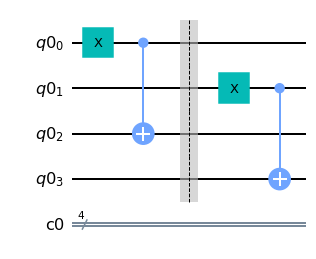

In [10]:
qc.draw('mpl')

In [11]:
from qiskit import transpile

In [12]:
qc_compliled = transpile(qc,backend)

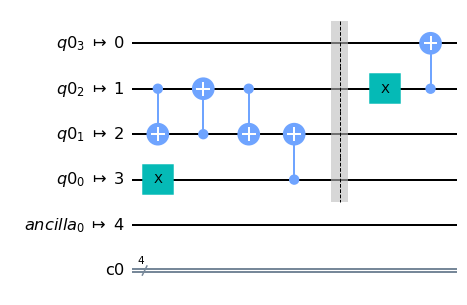

In [13]:
qc_compliled.draw('mpl')

In [14]:
from qiskit.visualization import plot_circuit_layout

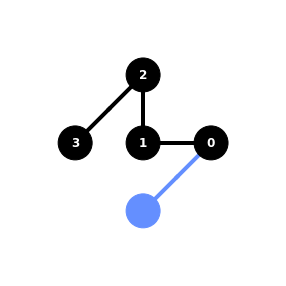

In [15]:
plot_circuit_layout(qc_compliled,backend)

In [16]:
qc_basis = qc_compliled.decompose()

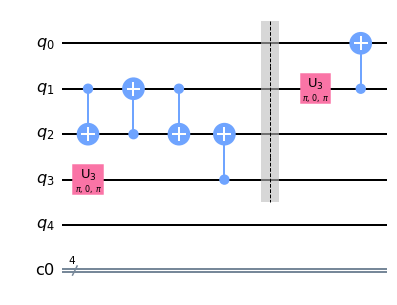

In [17]:
qc_basis.draw('mpl')

In [18]:
qc_manually_compiled = transpile(qc,backend,initial_layout=[3,4,1,0])

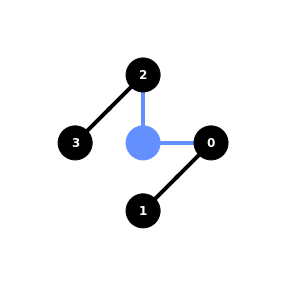

In [19]:
plot_circuit_layout(qc_manually_compiled,backend)

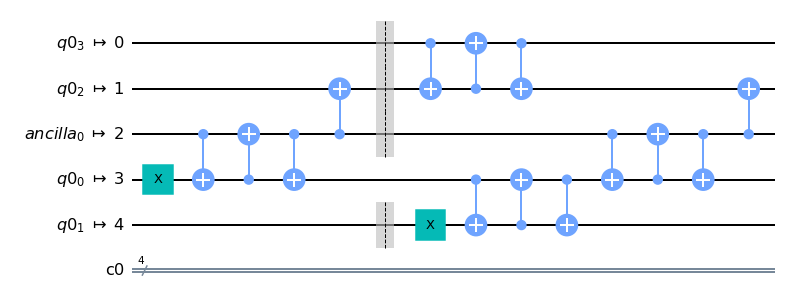

In [20]:
qc_manually_compiled.draw('mpl')

In [21]:
qc_compliled.depth()

6

In [22]:
qc_manually_compiled.depth()

13

In [23]:
for i in range(4):
    qc_compiled_optimazation = transpile(qc,backend,optimization_level=i)
    print('Optimization Level',i)
    print('Depth:', qc_compiled_optimazation.depth())
    print('Gate counts:', qc_compiled_optimazation.count_ops())

Optimization Level 0
Depth: 10
Gate counts: OrderedDict([('cx', 11), ('x', 2), ('barrier', 1)])
Optimization Level 1
Depth: 6
Gate counts: OrderedDict([('cx', 5), ('x', 2), ('barrier', 1)])
Optimization Level 2
Depth: 4
Gate counts: OrderedDict([('x', 2), ('cx', 2), ('barrier', 1)])
Optimization Level 3
Depth: 4
Gate counts: OrderedDict([('x', 2), ('cx', 2), ('barrier', 1)])


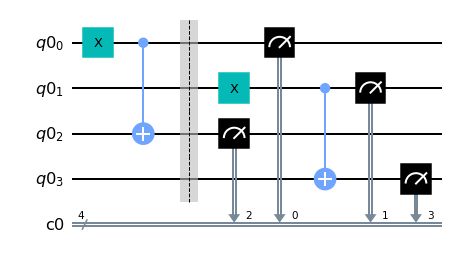

In [24]:
for i in range(4):
    qc.measure(q[i],c[i])
qc.draw('mpl')

In [25]:
qc0 = transpile(qc,backend,optimization_level=0)
qc1 = transpile(qc,backend,optimization_level=1)
qc2 = transpile(qc,backend,optimization_level=2)
qc3 = transpile(qc,backend,optimization_level=3)
qc_list = [qc0,qc1,qc2,qc3]

In [26]:
job = backend.run(qc_list,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

[{'1000': 2, '1001': 6, '0010': 6, '0001': 8, '1011': 93, '1110': 45, '1010': 22, '1111': 593, '1100': 6, '0101': 27, '0000': 19, '0011': 72, '0111': 80, '0100': 16, '0110': 5, '1101': 24}, {'1000': 7, '1001': 3, '0001': 24, '0010': 6, '1101': 38, '1011': 46, '1010': 58, '1111': 501, '0011': 10, '0111': 31, '0000': 54, '0110': 6, '0100': 54, '1110': 89, '0101': 91, '1100': 6}, {'1001': 2, '1000': 1, '1011': 55, '1010': 4, '1111': 797, '1110': 56, '1101': 65, '1100': 6, '0101': 3, '0011': 3, '0111': 32}, {'0010': 2, '0100': 1, '0110': 7, '1001': 5, '1101': 33, '1011': 65, '1110': 57, '1010': 30, '1111': 760, '0011': 5, '0111': 51, '0101': 6, '1100': 2}]


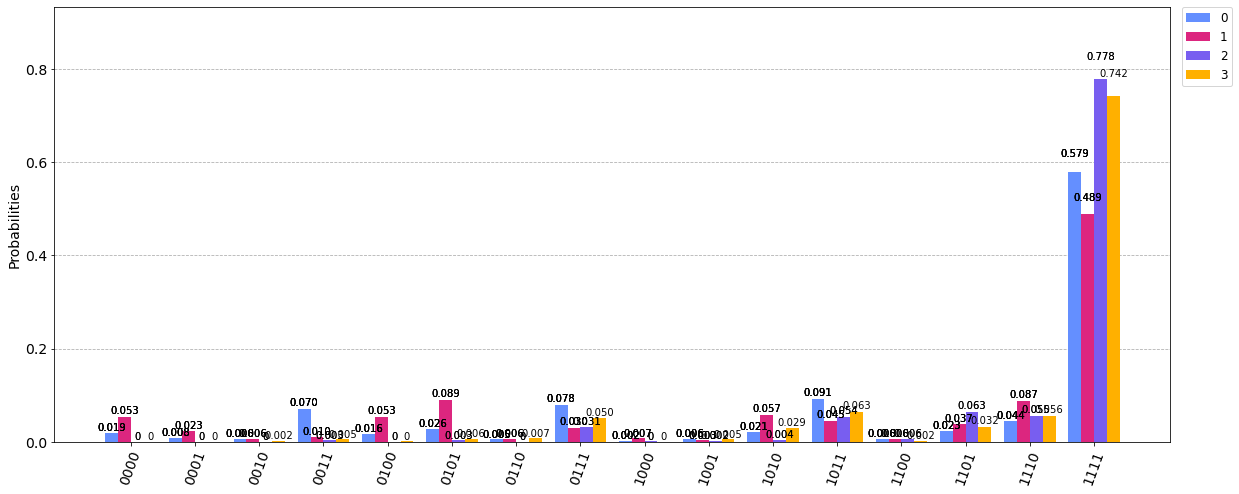

In [27]:
from qiskit.visualization import plot_histogram
plot_histogram(counts,figsize=(20,8),legend=['0','1','2','3'])

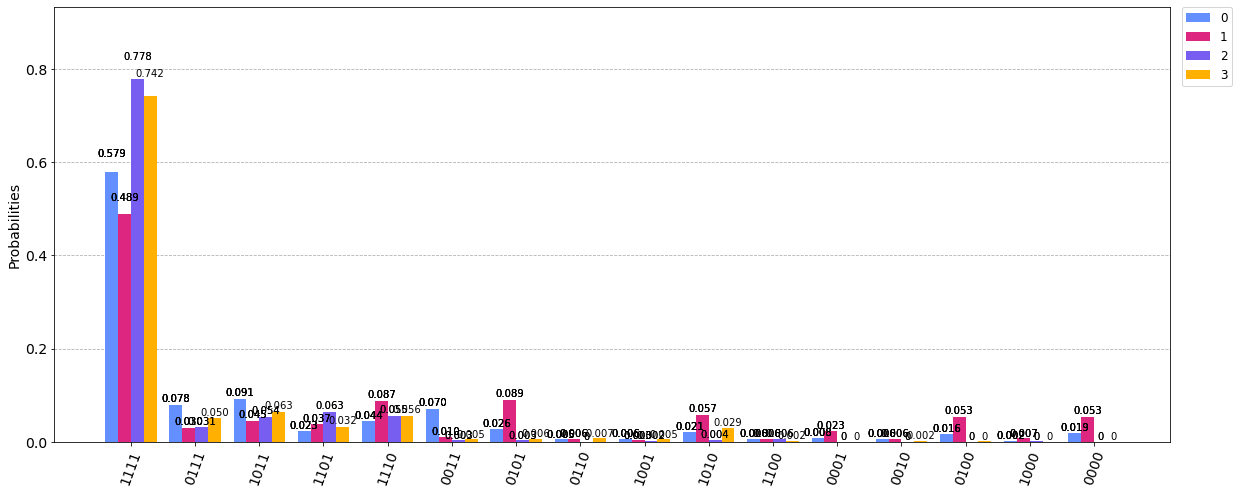

In [28]:
from qiskit.visualization import plot_histogram
plot_histogram(counts,figsize=(20,8),legend=['0','1','2','3'],target_string='1111',sort='hamming')